<a href="https://colab.research.google.com/github/LDONoronha/MVP_analise_exploratoria_de_dados/blob/main/MVPML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USAR MACHINE LEARNING PARA DESCOBRIR PESSOAS COM TRAÇOS DE PERSONALIDADE SEMELHANTES**

**1) Definição do Problema**

Objetivo: Descobrir traços de personalidade semelhantes

A partir de uma base de dados criar um sistema para detecção de traços de personalidade semelhantes por meio do agrupamento de dados.

O teste realizado consiste em cinquenta itens com 5 alternativas.

Este conjunto de dados contém 1.015.342 respostas a questionários coletados on-line pela Psicometria Aberta.

Link do dataset https://www.kaggle.com/datasets/tunguz/big-five-personality-test?resource=download

**2) Preparação de Dados**

In [ ]:
!pip install scikit-learn

In [1]:
import warnings
warnings.filterwarnings("ignore")
# importando blibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from io import open
pd.options.display.max_columns = 150

In [2]:
# montando o Google Drive no ambiente Colab para carregar os dados
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# carregando dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MVP_ML/data-final.csv', sep = '\t')


In [4]:
# visualizando o dataset
df.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


Preparação de dados

In [6]:
# excluindo atributos irrelevantes
df.drop(df.columns[50:110], axis = 1, inplace = True)

In [ ]:
# verificando os dados
df.head()

In [ ]:
# Analisando estatisticas da base de dados
pd.options.display.float_format = "{:.2f}".format
df.describe()

In [ ]:
# verificando a contagem dos registros por valor
df["EXT1"].value_counts()

In [ ]:
#selecionando o total de registros com o valor zero
df[(df == 0.00).all(axis=1)].describe()

3) Modelagem

In [16]:
# limpando o dataframe com apenas registro maiores que zero
df = df[(df >0.00).all(axis=1)]

In [ ]:
# verificando a contagem de registros por valor
df["EXT1"].value_counts()

Definição de números de clusters para iniciar testes






In [ ]:
# instalando yellowbrick
!pip install yellowbrick

In [58]:
# importando as novas bibliotecas que irei trabalhar
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [59]:
# Instanciando o metodo KMeans e o Visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [60]:
# Selecionando uma amostra aleatória dos dados com 5000 observacões
df_sample = df.sample(n=5000, random_state=1)


# Teste

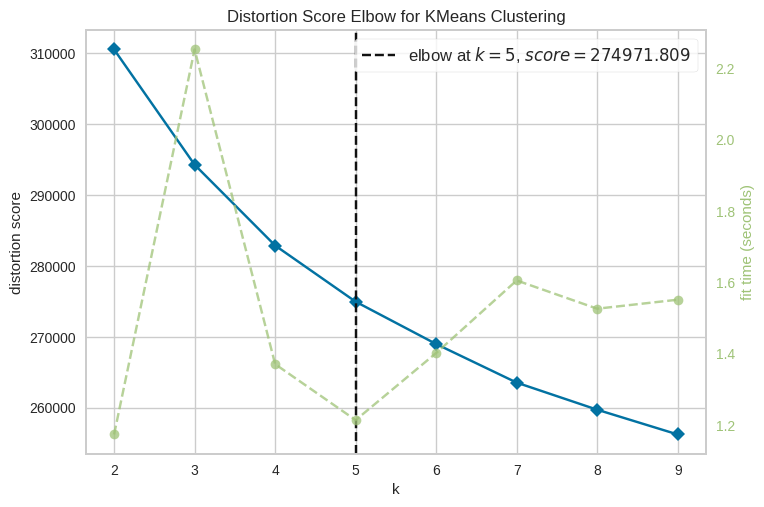

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
visualizer.fit(df_sample)
visualizer.poof()

# TREINAMENTO

In [62]:
# atribuindo os registros aos devidos grupos
kmeans = KMeans(n_clusters=5)
k_fit =  kmeans.fit(df)

In [63]:
# inserindo os rótulos de clusters no dataframe
predicoes = k_fit.labels_
df['Clusters'] = predicoes


In [ ]:
# verificando os dados
df.head()

Analisando os grupos

In [ ]:
# qual a quantidade de observações em cada grupo?
df["Clusters"].value_counts()

In [ ]:
# agrupando os registros por grupos e tirando a média
df.groupby('Clusters').mean()

Calculando a média de cada grupo de questões para verificar um padrao

In [67]:
# selecionando colunas de cada grupo
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [68]:
# Somando os valores de cada grupo
# para isso vou criar um novo dataframe
df_soma = pd.DataFrame()
df_soma['extroversion'] = df[ext].sum(axis=1)/10
df_soma['neurotic'] = df[est].sum(axis=1)/10
df_soma['agreeable'] = df[agr].sum(axis=1)/10
df_soma['conscientious'] = df[csn].sum(axis=1)/10
df_soma['open'] = df[opn].sum(axis=1)/10
df_soma['Clusters'] = predicoes


In [69]:
# Exibindo o valor médio por grupo
df_soma.groupby('Clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
Clusters,,,,,
0,3.07,3.43,3.31,3.22,3.37
1,2.97,3.66,3.16,3.18,3.25
2,3.00,2.63,2.95,3.03,3.25
3,3.06,3.01,3.20,3.16,3.24
4,3.09,2.42,3.21,3.11,3.34


In [70]:
# Visualizando as médias por grupo
df_clusters = df_soma.groupby('Clusters').mean()

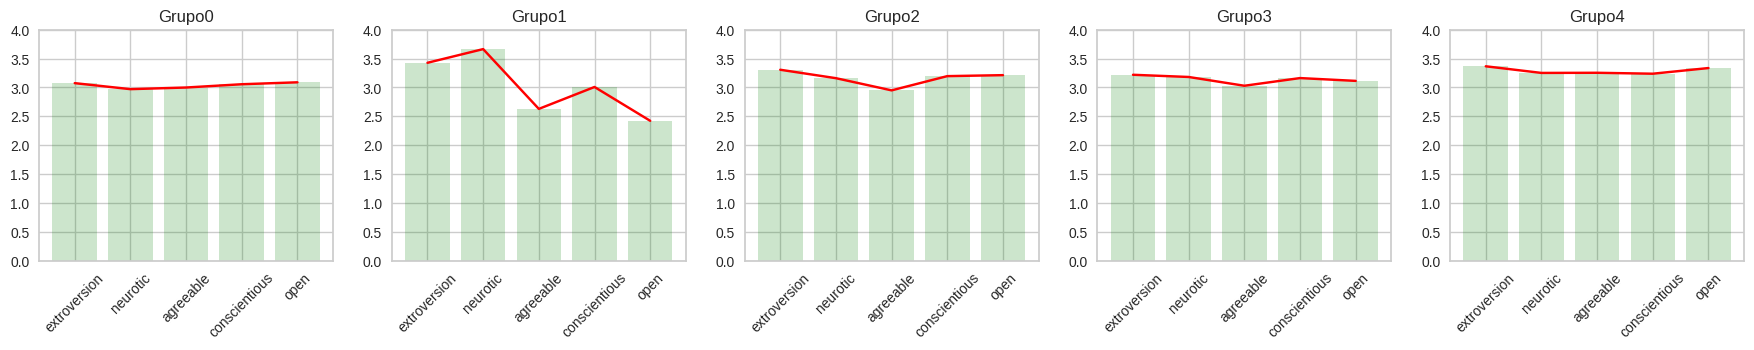

In [71]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
  plt.subplot(1,5,i+1)
  plt.bar(df_clusters.columns,df_clusters.iloc[:, i], color = 'green', alpha=0.2)
  plt.plot(df_clusters.columns,df_clusters.iloc[:, i], color = 'red')
  plt.title('Grupo' + str(i))
  plt.xticks(rotation=45)
  plt.ylim(0,4)


In [34]:
# Criando uma planilha para entrar com os dados
df[:0].to_excel("perguntas.xlsx", index=False)

In [35]:
# Recuperando os dados
meus_dados = pd.read_excel('perguntas.xlsx')

In [36]:
# Passando meus dados para o modelo
grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é: ', grupo_personalidade)

Meu grupo de personalidade é:  1


Melhorando a esse input de dados

In [ ]:
# instalando a biblioteca grandio
!pip install gradio

In [74]:
import gradio as gr

In [75]:
# lendo os dados com as questões
dicio_question = open("/content/drive/My Drive/Colab Notebooks/MVP_ML/question.txt").read().split("\n")

In [ ]:
# verificando os dados
dicio_question

In [77]:
# Limpando os dados e recuperando apenas as questões
question = []
for q in dicio_question:
  q = str(q)
  question.append(q[q.find("\t"):].lstrip())

In [ ]:
# verificando os dados
question

In [80]:
# Criando os inputs dinamicos para passar ao gradio
inputs_question = []
for q in question:
  obj_input = gr.Slider(minimum=1, maximum=5, step=1, value=3, label=q)
  inputs_question.append(obj_input)

In [ ]:
# verificando inputs
inputs_question

In [ ]:
# criando a interface e a função predict
def predict(*outputs_question):
  outputs_question = np.array(outputs_question).reshape(1, -1)
  return k_fit.predict(outputs_question)

iface = gr.Interface(
                    fn = predict,
                    title = "Big Five Personality",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = inputs_question,
                    outputs = "text")
iface.launch(share=True)